# Purpose: Coloring Segmented Images According to Shape Mode

Date Created: 1-26-2021

Date Updated: 1-27-2020
Date Updated: 6-25-2021 updated to change the color scheme to Twilight and process only the images used for the shape mode vs shape featuer figure in the Ferret Publication

Author: Hawley Helmbrecht

**Colors:** 

shape mode 1: Blue

shape mode 2: Orange

shape mode 3: Green

shape mode 4: Red

shape mode 5: Purple

*Step 1: Import Necessary Packages*

In [42]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from PIL import Image

*Step 2: User input variables*

In [46]:
im_file_path = '/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/female/Epo/corpus_callosum/threshold_ims/xy01c1_threshold.png'
csv_file_path = '/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/female/Epo/corpus_callosum/threshold_ims/c1_registry.csv'

*Step 3: Reading in the Image and CSV with Labels*

In [47]:
img = mpimg.imread(im_file_path)
csv_df = pd.read_csv(csv_file_path)

In [48]:
csv_df

,Filename,ImageID,ObjectID,X,Y,Area,Perimeter,Major Axis,Minor Axis,Circularity,Aspect Ratio,Shape mode,Contour fit
0,xy01c1_threshold.png,1,5,4,18,39,22.727922,8.616694,6.071115,0.948757,1.419293,1,4.06
1,xy02c1_threshold.png,2,19,100,141,89,40.006097,16.200718,7.647885,0.698791,2.118327,1,3.76
2,xy03c1_threshold.png,3,8,136,104,124,80.976659,31.291623,15.761418,0.237636,1.985330,1,4.22
3,xy03c1_threshold.png,3,12,64,199,39,28.727922,13.073971,5.720731,0.593835,2.285367,1,5.29
4,xy02c1_threshold.png,2,1,18,2,25,16.242641,6.240789,5.230349,1.190794,1.193188,2,5.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,xy02c1_threshold.png,2,20,229,151,236,94.497475,28.826379,14.090351,0.332110,2.045824,5,7.77
60,xy02c1_threshold.png,2,23,167,158,30,19.313709,7.948413,5.023108,1.010648,1.582370,5,2.32
61,xy02c1_threshold.png,2,27,95,206,234,103.568543,34.512396,11.825062,0.274138,2.918581,5,6.11
62,xy03c1_threshold.png,3,2,108,42,272,122.225397,41.817020,17.156045,0.228800,2.437451,5,5.83


*Step 4: Getting the file name*

In [49]:
im_file_name_split = im_file_path.split('/')
length = len(im_file_name_split)
file_name = im_file_name_split[length-1]
file_name

'xy01c1_threshold.png'

*Step 5: Creating a mask for labeling*

In [50]:
mask_b = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_o = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_g = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_r = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
mask_p = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)

In [51]:
start_pt = (14,111)
cv2.floodFill(img, mask, start_pt, (0,0,255), flags=4)

NameError: name 'mask' is not defined

In [52]:
mask = mask[1:-1, 1:-1]

NameError: name 'mask' is not defined

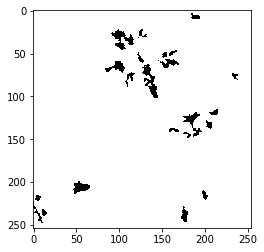

In [165]:
plt.imshow(mask, cmap='gray')

*Step X: Automating the Process*

*Step 1: Import need_to_label_list*

In [53]:
need_to_label_list_file_path = '/Users/hhelmbre/Desktop/KH_OGD_ferret/extra/need_to_label_list_foroverall_twlight.csv'
need_to_label_list = pd.read_csv(need_to_label_list_file_path)
need_to_label_list

,Image file path,Image Label Path
0,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/fem...,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/fem...
1,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/fem...,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/fem...
2,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/fem...,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/fem...
3,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/mal...,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/mal...
4,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/mal...,/Users/hhelmbre/Desktop/KH_OGD_ferret/Iba1/mal...


In [56]:
label_save_file_path = '/Users/hhelmbre/Desktop/KH_OGD_ferret/labeledimsoverall_twilight'

*Add in a step here to visualize the shape mode labels with the colors I chose*

In [10]:
def c(x):
   col = plt.cm.twilight(x)
   fig, ax = plt.subplots(figsize=(1,1))
   fig.set_facecolor(col)
   ax.axis("off")
   plt.show()

0.0


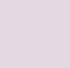

0.04736842105263158


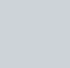

0.09473684210526316


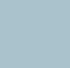

0.14210526315789473


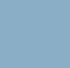

0.18947368421052632


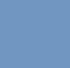

0.2368421052631579


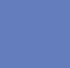

0.28421052631578947


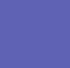

0.3315789473684211


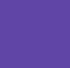

0.37894736842105264


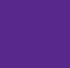

0.4263157894736842


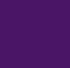

0.4736842105263158


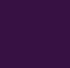

0.5210526315789474


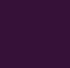

0.5684210526315789


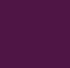

0.6157894736842106


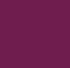

0.6631578947368422


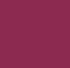

0.7105263157894737


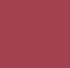

0.7578947368421053


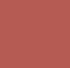

0.8052631578947369


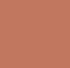

0.8526315789473684


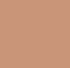

0.9


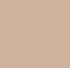

In [60]:
color_list = np.linspace(0,.9,20)
for options in color_list:
    print(options)
    c(options)

*The code to actually recolor the images*

xy01c1_threshold.png
xy03c1_threshold.png
xy02c1_threshold.png
xy01c1_threshold.png
xy02c1_threshold.png


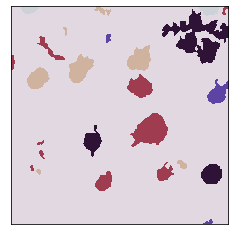

In [64]:
k = 0
for images in range(len(need_to_label_list)):
    
    #Reading in the image and its labels
    im_file_path = need_to_label_list['Image file path'][k]
    img = mpimg.imread(im_file_path)
    csv_df = pd.read_csv(need_to_label_list['Image Label Path'][k])
    
    #Getting the file path from the file name
    im_file_name_split = im_file_path.split('/')
    length = len(im_file_name_split)
    file_name = im_file_name_split[length-1]
    print(file_name)
    
    mask = np.zeros(np.asarray(img.shape)+2, dtype=np.uint8)
    
    csv_df = csv_df[csv_df.Filename == file_name]
    csv_df = csv_df.reset_index(drop=True)
    
    for shapes in range(len(csv_df)):
        shape_mode = (csv_df['Shape mode'][shapes]).astype(int)
        start_pt = (csv_df['X'][shapes], csv_df['Y'][shapes])
        area =csv_df['Area'][shapes]
        
        if img[csv_df['Y'][shapes]][csv_df['X'][shapes]]== 1:
            if shape_mode==1: #0.5
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 128

            elif shape_mode==2: #0.047
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 12
            elif shape_mode==3: #0.7
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 179

            elif shape_mode==4: #0.33
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 85

            elif shape_mode==5: #0.9
                cv2.floodFill(img, mask, start_pt, 0, flags=0)
                mask[mask == 1] = 230

            if shapes == len(csv_df)-1:
                mask = mask[1:-1, 1:-1]
                mask[0][0] = 255
                
                plt.imshow(mask,cmap='twilight')
                plt.tick_params(
                    axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False)
                plt.yticks([])
                plt.savefig(str(label_save_file_path + str(k) + file_name), bbox_inches = 'tight',
    pad_inches = 0)

                #img_to_save = Image.fromarray(mask)
                #img_to_save.save(str(label_save_file_path + str(k) + file_name))

    
    k += 1

*Step 3: Environment Specs*

In [59]:
csv_df

,Filename,ImageID,ObjectID,X,Y,Area,Perimeter,Major Axis,Minor Axis,Circularity,Aspect Ratio,Shape mode,Contour fit
0,xy02c1_threshold.png,2,1,21,3,154,52.556349,21.896661,9.579868,0.700616,2.285696,2.0,8.75
1,xy02c1_threshold.png,2,2,107,5,91,55.870058,22.018528,7.685603,0.366347,2.864906,5.0,7.13
2,xy02c1_threshold.png,2,3,184,3,83,58.384776,22.211998,8.469891,0.305977,2.622466,3.0,6.26
3,xy02c1_threshold.png,2,4,211,48,3215,707.032575,99.837587,65.880145,0.080819,1.515443,1.0,9.63
4,xy02c1_threshold.png,2,5,232,4,212,63.970563,23.878207,12.203667,0.651007,1.956642,2.0,6.68
5,xy02c1_threshold.png,2,6,251,4,43,27.485281,12.664339,5.712759,0.715283,2.216852,3.0,6.08
6,xy02c1_threshold.png,2,7,64,29,28,21.485281,11.547660,4.120446,0.762230,2.802527,5.0,4.90
7,xy02c1_threshold.png,2,8,113,37,48,25.899495,10.670354,5.969059,0.899225,1.787611,4.0,4.14
8,xy02c1_threshold.png,2,9,44,50,209,103.497475,47.048451,10.132734,0.245187,4.643214,3.0,3.45
9,xy02c1_threshold.png,2,10,151,62,586,104.840620,32.691920,24.253011,0.669959,1.347953,5.0,2.83


In [28]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
u, indices = np.unique(mask, return_inverse=True)

In [30]:
u

array([  0,  20, 100, 255], dtype=uint8)

In [31]:
mask[0][0]

0